In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as scp
import io

%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data_ktvp.xlsx to data_ktvp (1).xlsx


In [6]:
data1 = io.BytesIO(uploaded['data_ktvp.xlsx'])

In [7]:
df = pd.read_excel(
    data1
)

In [8]:
df

,x,y
0,0,0.012
1,10,0.023
2,20,0.017
3,30,0.012
4,40,0.011
5,50,0.025
6,60,0.013
7,70,0.015
8,80,0.016
9,90,0.012


In [9]:
a_vir = ((df.iloc[-1,-1] - df.iloc[0, -1]) / (df.iloc[-1, 0] - df.iloc[0, 0]))
a_vir

6.000000000000001e-05

In [10]:
b_vir = df.iloc[0, -1]
b_vir

0.012

In [11]:
df['Y_vir'] = (df['x'] * a_vir) + b_vir
df

,x,y,Y_vir
0,0,0.012,0.0120
1,10,0.023,0.0126
2,20,0.017,0.0132
3,30,0.012,0.0138
4,40,0.011,0.0144
5,50,0.025,0.0150
6,60,0.013,0.0156
7,70,0.015,0.0162
8,80,0.016,0.0168
9,90,0.012,0.0174


In [12]:
df['delta_vir'] = df['y'] - df['Y_vir']
df

,x,y,Y_vir,delta_vir
0,0,0.012,0.0120,0.0000
1,10,0.023,0.0126,0.0104
2,20,0.017,0.0132,0.0038
3,30,0.012,0.0138,-0.0018
4,40,0.011,0.0144,-0.0034
5,50,0.025,0.0150,0.0100
6,60,0.013,0.0156,-0.0026
7,70,0.015,0.0162,-0.0012
8,80,0.016,0.0168,-0.0008
9,90,0.012,0.0174,-0.0054


In [13]:
otkl_prymol = df['delta_vir'].max() - df['delta_vir'].min()
otkl_prymol

0.0162

In [14]:
f1 = lambda x: np.max(sum((df['x'] * x[0] + x[1] - df['y']) ** 2))
result = scp.minimize(f1, [1, 1], method = 'SLSQP')
a_sr = result.x[0]
b_sr = result.x[1]
print(f'a_cp = {a_sr}\nb_cp = {b_sr}')

a_cp = 2.2189434926437462e-05
b_cp = 0.01527361904024871


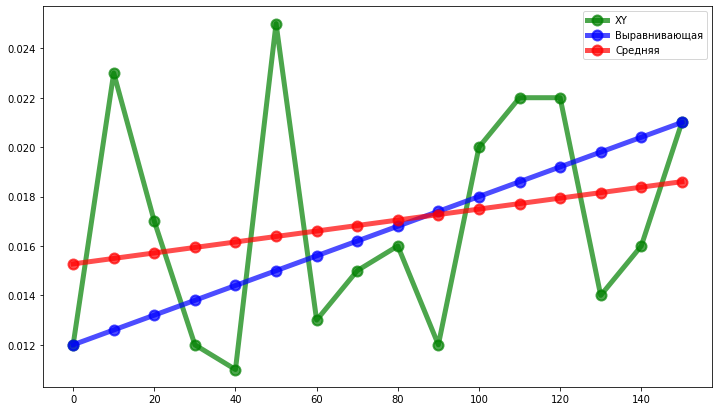

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(df['x'], df['y'], 'o-g', alpha=0.7, label="XY", lw=5, mec='g', mew=2, ms=10)
plt.plot(df['x'], df['Y_vir'], 'o-b', alpha=0.7, label="Выравнивающая", lw=5, mec='b', mew=2, ms=10)
plt.plot(df['x'], a_sr * df['x'] + b_sr, 'o-r', alpha=0.7, label="Средняя", lw=5, mec='r', mew=2, ms=10)
plt.legend()

In [16]:
df['Y_sred'] = a_sr * df['x'] + b_sr
df['delta_sred'] = df['Y_sred'] - df['y']
otkl_prymol2 = df['delta_sred'].max() - df['delta_sred'].min()
err = (((otkl_prymol - otkl_prymol2) / otkl_prymol2) * 100).round(2)
print(f'Методическая погрешность составляет {err} %')

Методическая погрешность составляет 16.65 %
